## Завдання 1

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def generate_data(k, b, n_points=100, noise_scale=1.0):
    np.random.seed(42) 
    x = np.random.uniform(0, 10, n_points)
    noise = np.random.normal(0, noise_scale, n_points)
    y = k * x + b + noise
    return x, y

def least_squares(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    k_hat = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b_hat = y_mean - k_hat * x_mean
    
    return k_hat, b_hat

Початкова пряма: y = 2.5x + 5.0
Оцінена пряма (МНК): y = 2.45x + 5.2151
Оцінена пряма (np.polyfit): y = 2.45x + 5.2151


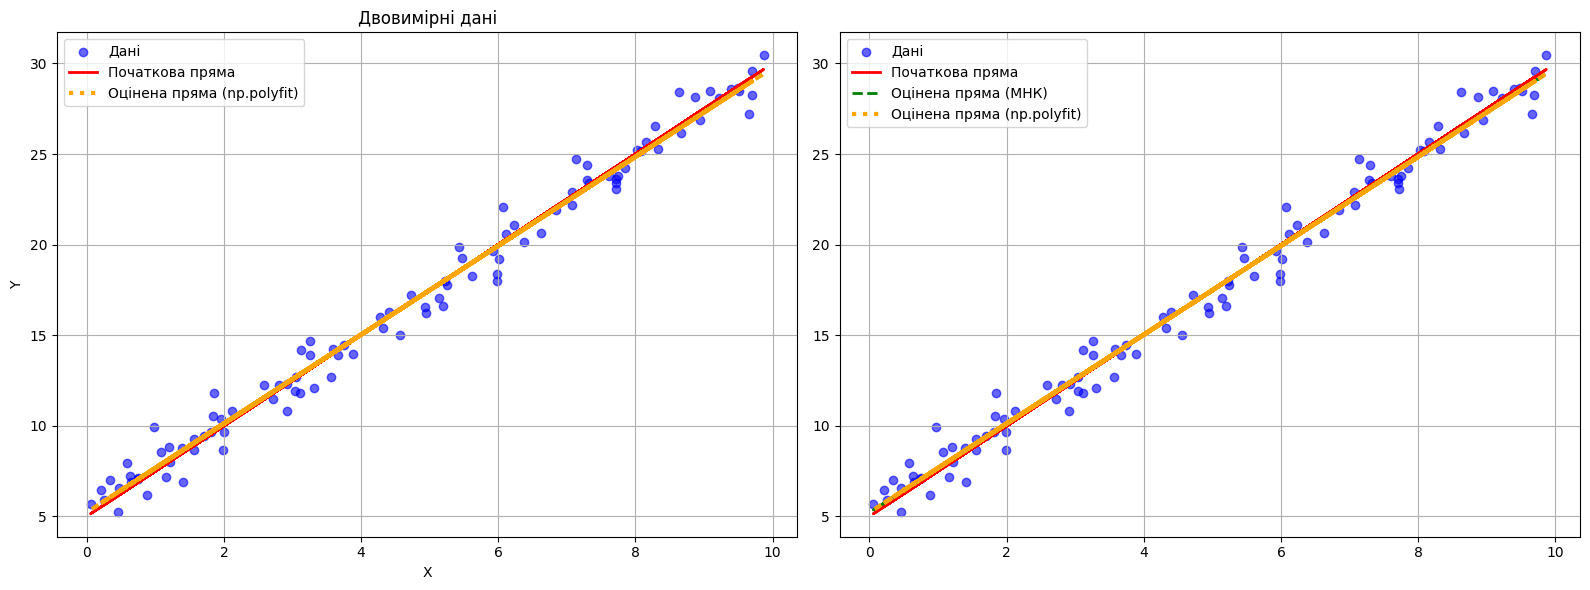

In [33]:
def plot_results(x, y, true_k, true_b, k_hat, b_hat, np_k, np_b):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    axs[0].scatter(x, y, color='blue', label='Дані', alpha=0.6)
    axs[0].plot(x, true_k * x + true_b, color='red', linewidth=2, label='Початкова пряма')
    axs[0].plot(x, np_k * x + np_b, color='orange', linestyle=':', linewidth=3, label='Оцінена пряма (np.polyfit)')
    axs[0].set_title('Двовимірні дані')
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Y')
    axs[0].legend()
    axs[0].grid(True)


    axs[1].scatter(x, y, color='blue', label='Дані', alpha=0.6)
    axs[1].plot(x, true_k * x + true_b, color='red', linewidth=2, label='Початкова пряма')
    axs[1].plot(x, k_hat * x + b_hat, color='green', linestyle='--', linewidth=2, label='Оцінена пряма (МНК)')
    axs[1].plot(x, np_k * x + np_b, color='orange', linestyle=':', linewidth=3, label='Оцінена пряма (np.polyfit)')
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Y')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    true_k = 2.5
    true_b = 5.0

    x, y = generate_data(true_k, true_b, n_points=100, noise_scale=1.0)

    k_hat, b_hat = least_squares(x, y)

    np_k, np_b = np.polyfit(x, y, 1)

    print(f"Початкова пряма: y = {true_k}x + {true_b}")
    print(f"Оцінена пряма (МНК): y = {k_hat:.2f}x + {b_hat:.4f}")
    print(f"Оцінена пряма (np.polyfit): y = {np_k:.2f}x + {np_b:.4f}")

    plot_results(x, y, true_k, true_b, k_hat, b_hat, np_k, np_b)


## Завдання 2

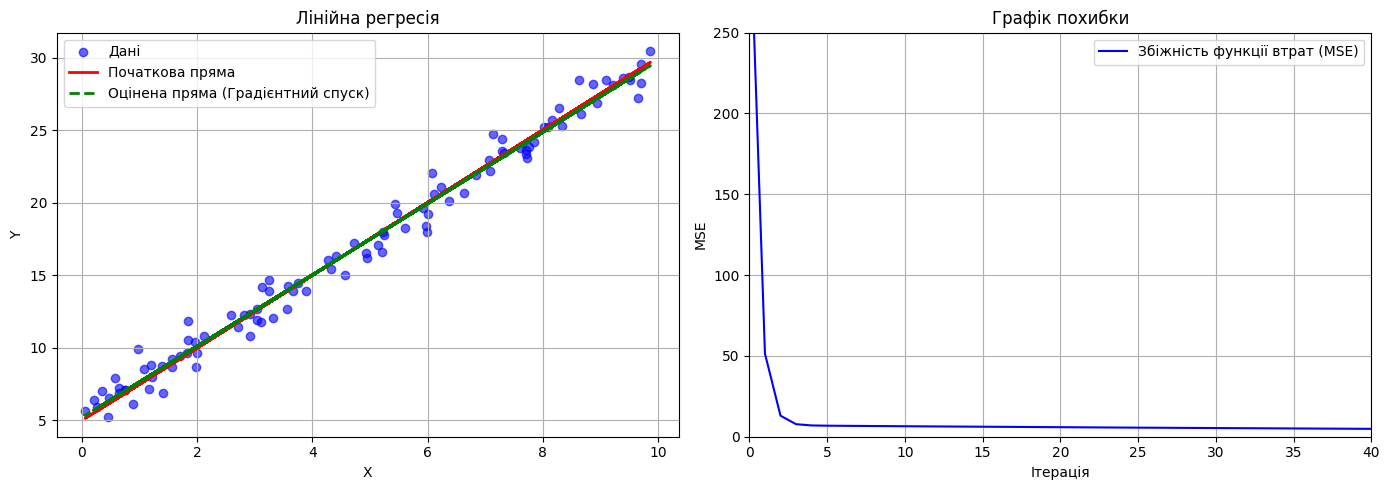

In [36]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    n = len(x)  
    k_hat, b_hat = 0.0, 0.0 
    losses = []

    for _ in range(n_iter):
        y_pred = k_hat * x + b_hat
        grad_k = (-2 / n) * np.sum(x * (y - y_pred))
        grad_b = (-2 / n) * np.sum(y - y_pred)
        k_hat -= learning_rate * grad_k
        b_hat -= learning_rate * grad_b
        loss = np.mean((y - y_pred) ** 2)
        losses.append(loss)

    return k_hat, b_hat, losses

if __name__ == "__main__":
    true_k, true_b = 2.5, 5.0
    np.random.seed(42)
    x = np.random.uniform(0, 10, 100)
    y = true_k * x + true_b + np.random.normal(0, 1.0, 100)

    learning_rate = 0.01
    n_iter = 1000
    k_hat, b_hat, losses = gradient_descent(x, y, learning_rate, n_iter)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].scatter(x, y, color='blue', label='Дані', alpha=0.6)
    axs[0].plot(x, true_k * x + true_b, color='red', linewidth=2, label='Початкова пряма')
    axs[0].plot(x, k_hat * x + b_hat, color='green', linestyle='--', linewidth=2, label='Оцінена пряма (Градієнтний спуск)')
    axs[0].set_title('Лінійна регресія')
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Y')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(range(n_iter), losses, label='Збіжність функції втрат (MSE)', color='blue')
    axs[1].set_xlim(0, 40)
    axs[1].set_ylim(0, 250)
    axs[1].set_title('Графік похибки')
    axs[1].set_xlabel('Ітерація')
    axs[1].set_ylabel('MSE') # середньоквадратична помилка (MSE)
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


## Порівняння двох результатів

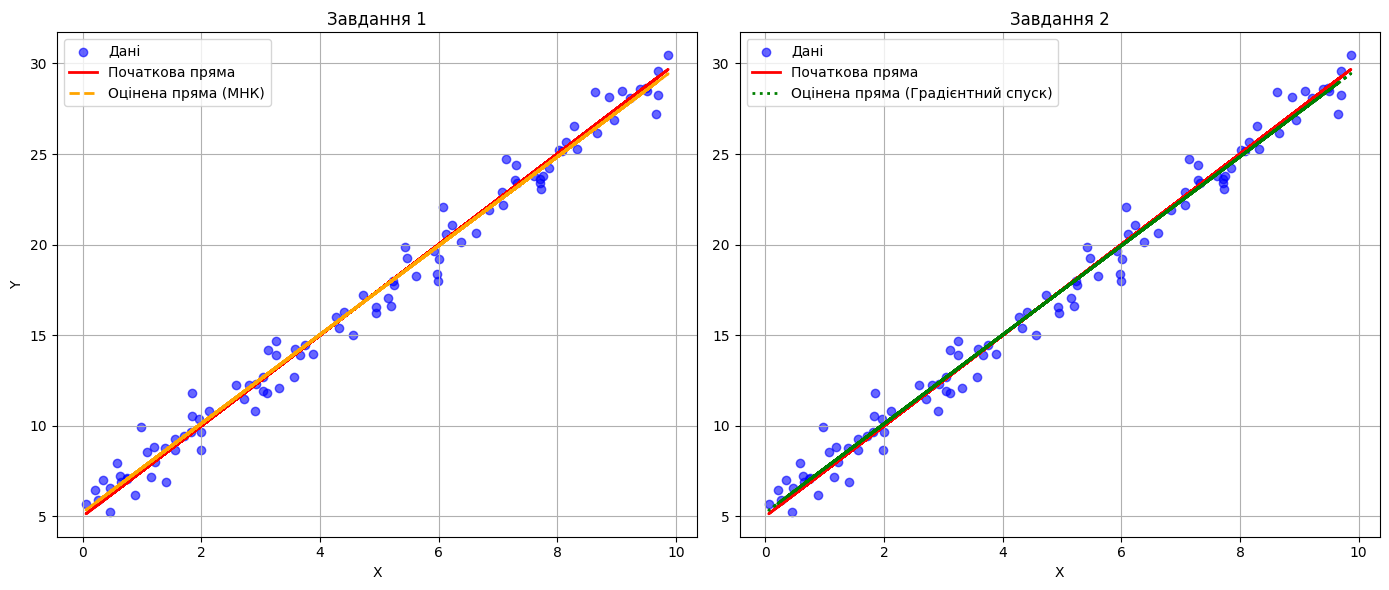

In [38]:
x, y = generate_data(true_k, true_b, n_points=100, noise_scale=1.0)
k_ls, b_ls = least_squares(x, y)

learning_rate = 0.01
n_iter = 1000
k_gd, b_gd, losses = gradient_descent(x, y, learning_rate, n_iter)   

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(x, y, color='blue', label='Дані', alpha=0.6)
axs[0].plot(x, true_k * x + true_b, color='red', linewidth=2, label='Початкова пряма')
axs[0].plot(x, k_ls * x + b_ls, color='orange', linestyle='--', linewidth=2, label='Оцінена пряма (МНК)')
axs[0].set_title('Завдання 1')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(x, y, color='blue', label='Дані', alpha=0.6)
axs[1].plot(x, true_k * x + true_b, color='red', linewidth=2, label='Початкова пряма')
axs[1].plot(x, k_gd * x + b_gd, color='green', linestyle=':', linewidth=2, label='Оцінена пряма (Градієнтний спуск)')
axs[1].set_title('Завдання 2')
axs[1].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

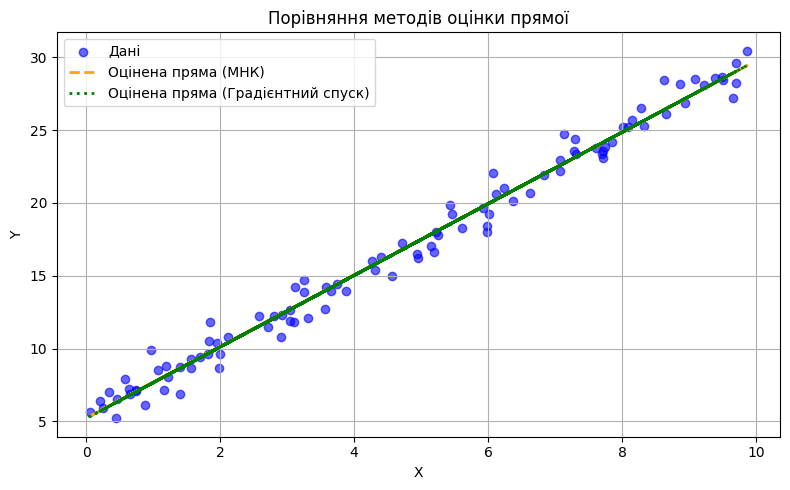

In [42]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Дані', alpha=0.6)
plt.plot(x, k_ls * x + b_ls, color='orange', linestyle='--', linewidth=2, label='Оцінена пряма (МНК)')
plt.plot(x, k_gd * x + b_gd, color='green', linestyle=':', linewidth=2, label='Оцінена пряма (Градієнтний спуск)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Порівняння методів оцінки прямої')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
